#Task 2 - Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice. Explore the relationships between variables and identify patterns and trends in the data.

# Dataset Information

## Context
New York City is one of the most popular travel destinations, leading to a highly competitive short-term rental market. Airbnb plays a significant role in offering accommodations, ranging from shared rooms to entire apartments. This dataset provides insights into the dynamics of Airbnb listings in NYC, helping to understand pricing strategies, availability trends, and host activities. The dataset is useful for data cleaning, exploratory data analysis (EDA), and visualization to derive meaningful business and travel insights.

## Content
### Columns
The dataset consists of the following attributes:
1. **id:** Unique identifier for each listing.
2. **name:** Name of the Airbnb listing.
3. **host_id:** Unique identifier for the host.
4. **host_name:** Name of the host.
5. **neighbourhood_group:** The borough in which the listing is located (e.g., Manhattan, Brooklyn, etc.).
6. **neighbourhood:** The specific neighborhood within the borough.
7. **latitude:** Geographic coordinate specifying the latitude of the listing.
8. **longitude:** Geographic coordinate specifying the longitude of the listing.
9. **room_type:** Type of room offered (e.g., Entire home/apt, Private room, Shared room).
10. **price:** Cost per night for the listing.
11. **minimum_nights:** Minimum number of nights required for a stay.
12. **number_of_reviews:** Total number of reviews received by the listing.
13. **last_review:** Date of the most recent review.
14. **reviews_per_month:** Average number of reviews per month.
15. **calculated_host_listings_count:** Total number of listings managed by the host.
16. **availability_365:** Number of available days in a year.

### Project Scope
The project involves:
- **Data Cleaning:** Handling missing values, correcting inconsistencies, and removing outliers.
- **Exploratory Data Analysis (EDA):** Understanding pricing trends, neighborhood preferences, and listing availability.
- **Data Visualization:** Using charts and heatmaps to uncover patterns in Airbnb listings.
- **Seasonal Trends:** Analyzing how pricing and availability fluctuate across different times of the year.

This dataset provides valuable insights for hosts, travelers, and analysts looking to understand Airbnb market dynamics in New York City.


#### Importing necessary libraries for data analysis

In [1]:
# Importing the librarie
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
from sklearn.model_selection import train_test_split  # Splitting dataset into train and test sets
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Encoding categorical data and scaling numerical features

#### Load the dataset

In [2]:
# Load dataset
df = pd.read_csv("AB_NYC_2019.csv")

# Show the first 5 Observations
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


###Data Overview

In [3]:
#Print dataset shape
print("Dataset Shape:", df.shape)

Dataset Shape: (48895, 16)


### Dataset Shape
The shape of the dataset is (48895, 16), which means:

- **48,895 rows:** Each row represents a unique Airbnb listing in New York City, containing details about its location, pricing, availability, and other attributes.
- **16 columns:** The dataset includes 16 different attributes, providing comprehensive information about each listing, including host details, neighborhood, room type, price, and listing availability.

In summary, this dataset contains a large number of Airbnb listings with multiple attributes, making it well-suited for detailed analysis of pricing trends, room type distributions, and seasonal variations in availability.


In [4]:
#Print column names
print("Column Names:", df.columns)

Column Names: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [5]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Dataset Summary
The dataset is a pandas DataFrame with the following characteristics:

- **Type:** `<class 'pandas.core.frame.DataFrame'>`
- **Number of Entries:** 48,895
- **RangeIndex:** From 0 to 48,894

#### **Data Types**
- `int64`: 4 columns (id, host_id, minimum_nights, number_of_reviews, availability_365)
- `float64`: 3 columns (latitude, longitude, reviews_per_month)
- `object`: 8 columns (name, host_name, neighbourhood_group, neighbourhood, room_type, etc.)
- `datetime64`: 1 column (last_review)

#### **Memory Usage**
- The dataset uses approximately **6.0+ MB** of memory.

### **Inference**
- **Data Completeness:** Some columns, such as `last_review` and `reviews_per_month`, may contain missing values.
- **Data Types:** The dataset contains numerical (`int64`, `float64`) and categorical (`object`) columns, allowing for various analyses and visualization techniques.
- **Memory Efficiency:** The dataset is relatively small in size, making it efficient to process and analyze.

In [6]:
# Get the statistical summary of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### Data Cleaning

In [7]:
# Calculate the number of missing values in each column of the DataFrame.
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [8]:
# Handling missing values
df['name'].fillna("Unknown", inplace=True)
df['host_name'].fillna("Unknown", inplace=True)
df['last_review'] = pd.to_datetime(df['last_review'])
df['reviews_per_month'].fillna(0, inplace=True)

<ipython-input-8-e7bb165c4225>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna("Unknown", inplace=True)
<ipython-input-8-e7bb165c4225>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

### Outlier Treatment

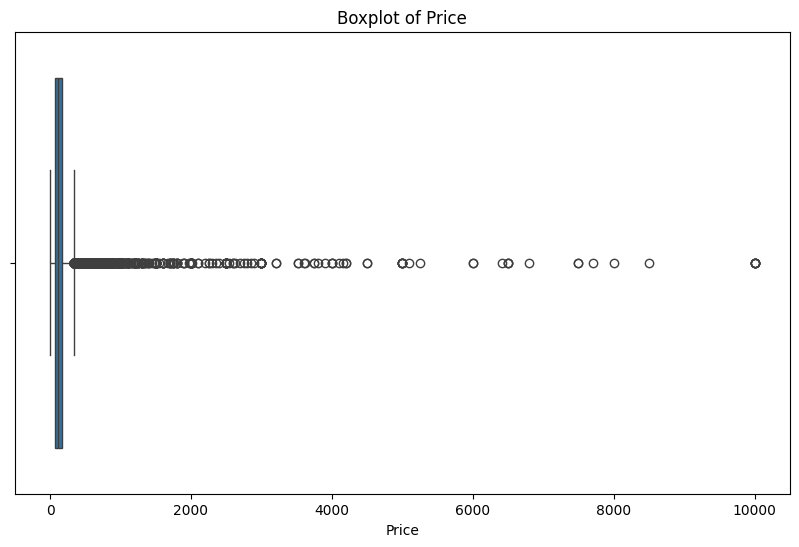

In [9]:
#Plot Boxplot to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="price")
plt.title("Boxplot of Price")
plt.xlabel("Price")
plt.show()

**Interpretation**

The boxplot visualizes the distribution of listing prices, helping to identify the presence of outliers.

- **Data Distribution:** The boxplot provides a summary of price distribution, including the median, quartiles, and extreme values.

- **Outlier Detection:** Any points beyond the whiskers indicate potential outliers, suggesting that some listings have significantly higher prices than the majority.

- **Price Variation:** The spread of the boxplot highlights how prices differ across listings, with a possible right-skewed distribution due to high-priced outliers.

- **Practical Insight:** Identifying outliers is essential for data cleaning, ensuring that extreme values do not skew statistical analysis or model predictions.

In [10]:
# Removing outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = remove_outliers(df, "price")
df_cleaned = remove_outliers(df_cleaned, "minimum_nights")

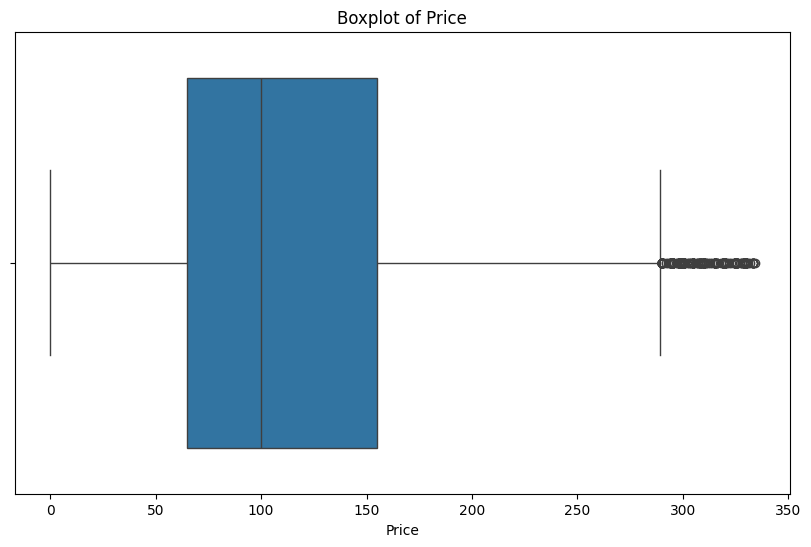

In [11]:
# Boxplot after removing Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x="price")
plt.title("Boxplot of Price")
plt.xlabel("Price")
plt.show()

**Interpretation**

The boxplot visualizes the price distribution after removing outliers, allowing for a clearer view of the typical price range.

- **Reduced Outlier Influence:** Compared to the original boxplot, extreme values have been removed, making the distribution more representative of most listings.

- **Better Price Insights:** The spread of prices is now more meaningful, helping identify the typical pricing patterns without distortion from extreme listings.

- **More Reliable Analysis:** Removing outliers ensures that statistical analysis and predictive modeling are not skewed by a few extremely high-priced listings.

- **Comparison with Original Data:** If the boxplot still shows a wide range, it suggests that variability in price is inherent to the dataset rather than just outlier-driven.

###Data Exploration

In [12]:
# Print the shape of the cleaned dataset
print("\nCleaned Dataset Shape:", df_cleaned.shape)


Cleaned Dataset Shape: (39738, 16)


In [13]:
# Print the data types of each column
print("Column Types:")
print(df_cleaned.dtypes)

Column Types:
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [14]:
# Print the the number of unique values in categorical columns.
print("\nUnique Values in Categorical Columns:")
print(df_cleaned.select_dtypes(include=['object']).nunique())


Unique Values in Categorical Columns:
name                   39018
host_name              10347
neighbourhood_group        5
neighbourhood            219
room_type                  3
dtype: int64


# Exploratory Data Analysis (EDA)

## Introduction
Exploratory Data Analysis (EDA) is a fundamental step in data analysis that helps in summarizing key characteristics of the dataset. It includes statistical measures, data visualization, and detecting potential anomalies. By performing EDA, we can better understand the data, identify patterns, and prepare it for further analysis or modeling.

## Importance in This Scenario
In this project, EDA plays a crucial role in:

- **Understanding Data Distribution:** By visualizing numerical features such as price, minimum nights, and reviews per month, we gain insights into their spread and central tendencies.
- **Detecting Outliers:** Boxplots and scatter plots help identify extreme values in price and other numerical variables that may affect analysis.
- **Checking Data Quality:** Handling missing values and inconsistencies ensures that the dataset is clean and reliable for further analysis.
- **Exploring Feature Relationships:** Correlation analysis and visualizations help uncover relationships between features such as room type, neighborhood, and price.
- **Seasonal Trends:** Analyzing variations in price and availability over time allows us to observe high-demand periods in NYC’s Airbnb market.

By performing EDA, we ensure a more structured approach to data analysis, leading to more accurate and meaningful insights from the dataset.


### Univariate Analysis

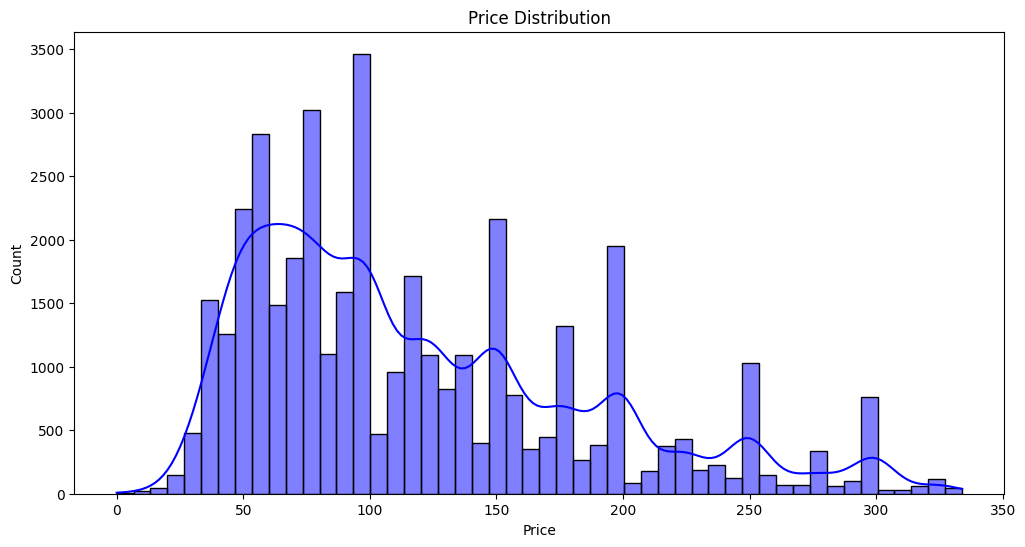

In [15]:
#Distribution of listing prices.
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

**Interpretation:**

The histogram visualizes the distribution of listing prices. The x-axis represents the price ranges, while the y-axis indicates the number of listings in each range. The insights from the plot include:

- **Price Distribution:** Most listings are priced below $200, with a sharp decline in frequency for higher-priced listings.
- **Outliers:** Some listings have extremely high prices, which may need further investigation.
- **Density Curve:** The KDE curve highlights the price distribution, showing a skewed distribution with a long tail toward high prices.


<ipython-input-16-8fdc820623e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x="room_type", palette="viridis")


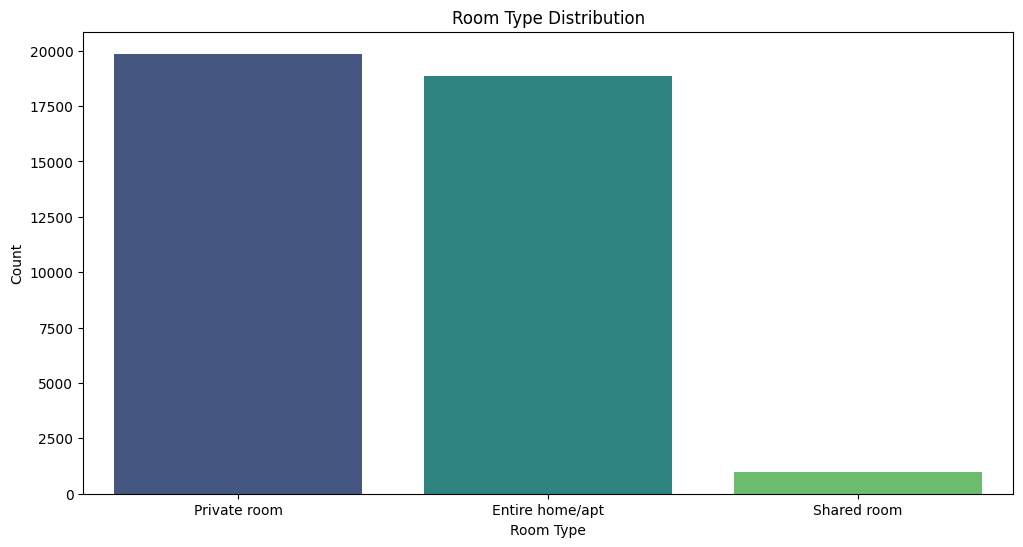

In [16]:
#Distribution of room types.
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x="room_type", palette="viridis")
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

**Interpretation:**

The bar plot shows the distribution of room types in Airbnb listings. The x-axis represents different room types, while the y-axis shows the count of listings for each category. The insights include:

- **Category Distribution:** Entire homes/apartments and private rooms dominate the market, while shared rooms are much less common.
- **Market Preferences:** The distribution suggests that most travelers prefer either renting an entire space or a private room rather than sharing with strangers.
- **Potential Business Insight:** Investors or hosts might focus on entire home listings due to their higher demand and pricing potential.

### Bivariate Analysis

<ipython-input-17-0b4ea2ea28db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="room_type", y="price", palette="coolwarm")


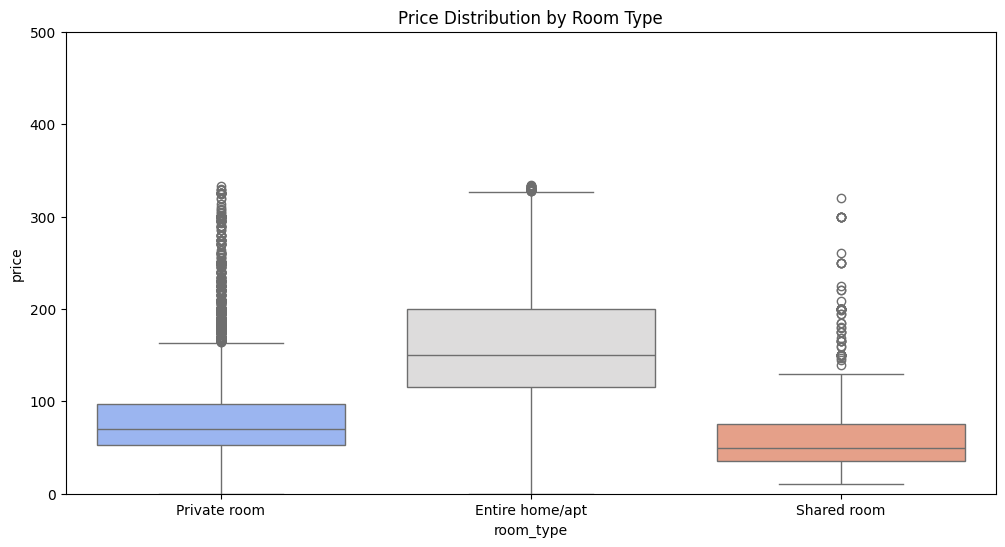

In [17]:
#Price variation by room type.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="room_type", y="price", palette="coolwarm")
plt.ylim(0, 500)
plt.title("Price Distribution by Room Type")
plt.show()

**Interpretation:**

The box plot illustrates the price variations across different room types. The x-axis represents room types, while the y-axis indicates price distributions. The insights include:

- **Median Prices:** Entire homes tend to have higher median prices than private and shared rooms.
- **Price Range:** Private rooms show a relatively lower price range, making them more affordable.
- **Outliers:** There are significant outliers, especially in the entire home category, suggesting some listings may be highly overpriced.


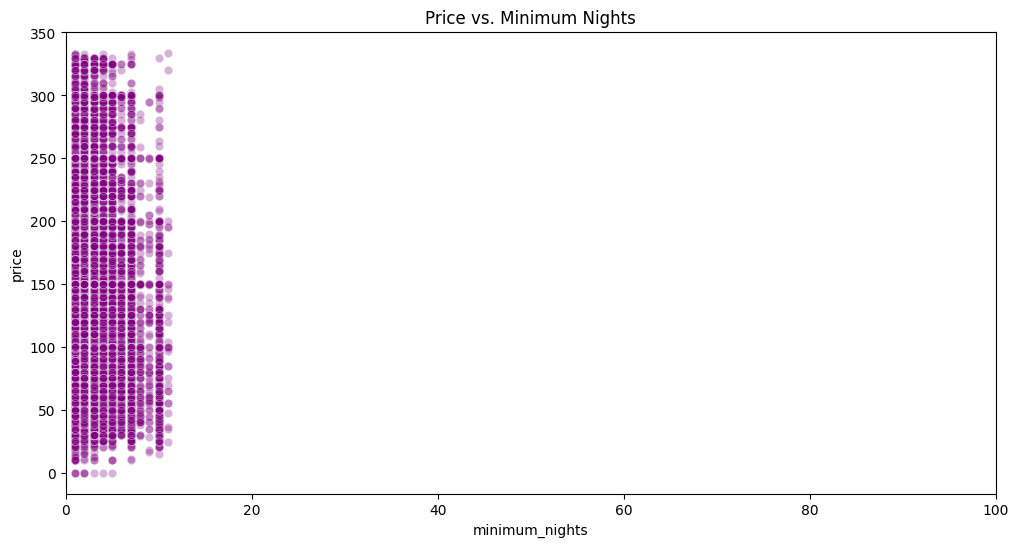

In [18]:
#Relationship between minimum nights and price.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x="minimum_nights", y="price", alpha=0.3, color="purple")
plt.xlim(0, 100)
plt.title("Price vs. Minimum Nights")
plt.show()

**Interpretation:**

The scatter plot examines the relationship between price and minimum nights required for booking. The x-axis represents minimum nights, while the y-axis shows the price. The insights include:

- **No Strong Correlation:** There is no clear relationship between price and minimum nights, as data points are widely dispersed.
- **High-Price Listings:** Some listings with long minimum stays have significantly higher prices, which could indicate luxury or long-term rental properties.
- **Common Stay Duration:** Most listings require fewer than 10 nights, suggesting short-term rentals dominate the market.


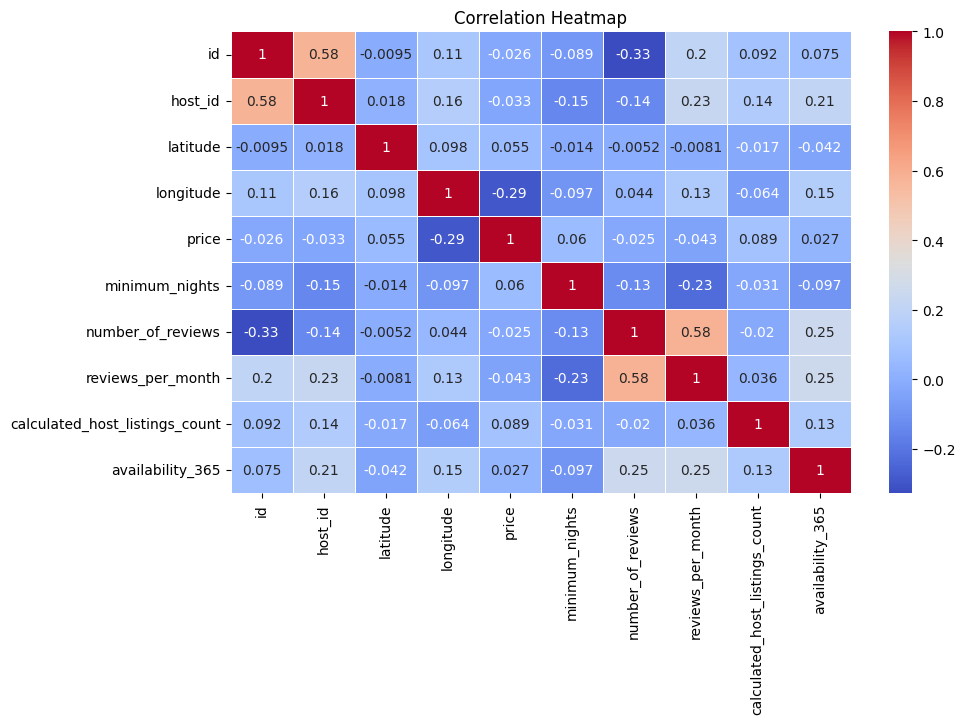

In [19]:
#Correlation heatmap of numerical features.
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df_cleaned.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Interpretation:**

The heatmap visualizes the correlation between numerical variables in the dataset. The color intensity represents the strength of the correlation. The insights include:

- **Weak Correlation with Price:** Price does not show strong correlation with most numerical variables, indicating that other factors (e.g., location, amenities) might influence pricing more.
- **Strong Relationship:** Reviews per month and number of reviews are positively correlated, suggesting popular listings get consistent reviews.
- **Availability Insight:** Availability and price do not have a strong relationship, meaning price does not dictate how often a listing is available.

### Multivariate Analysis

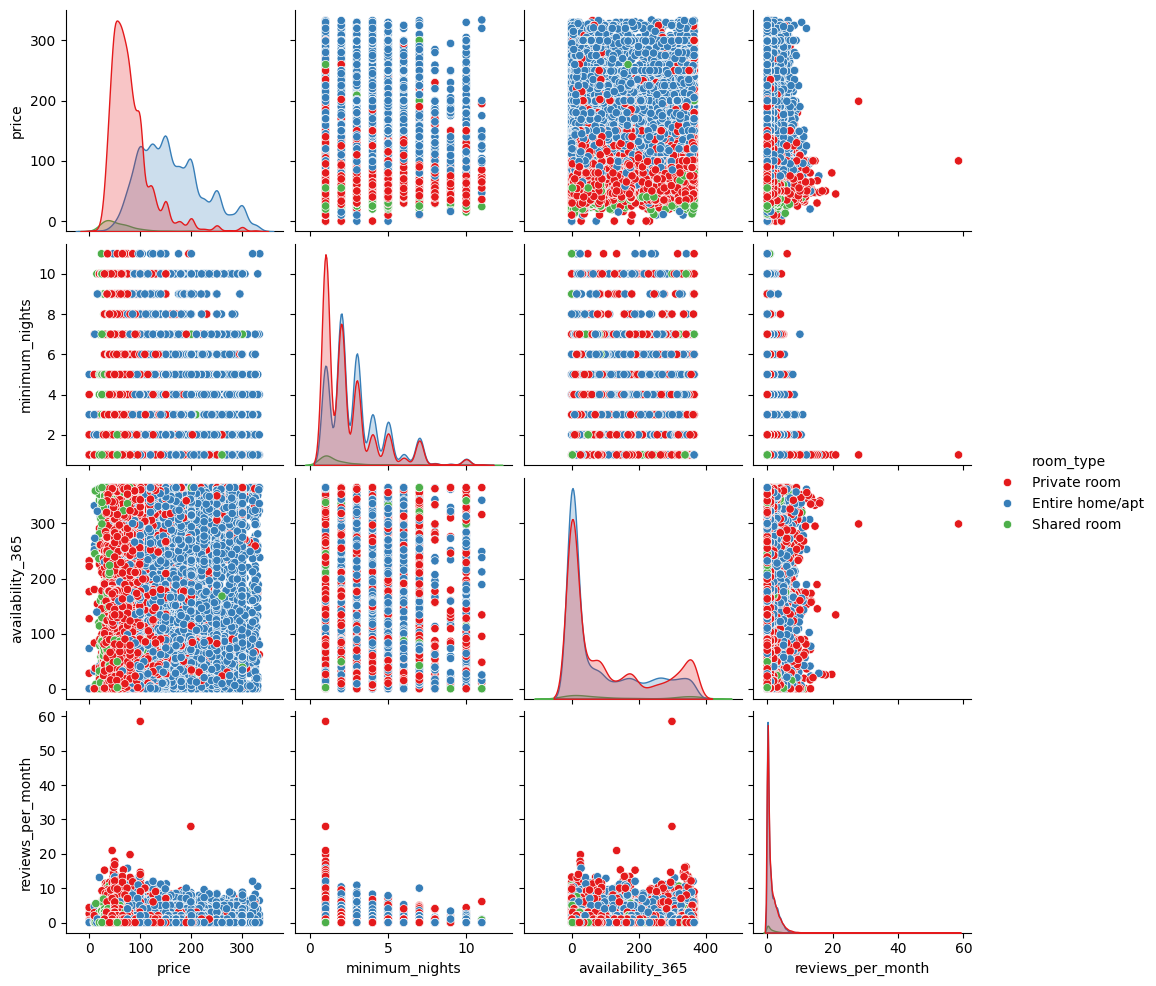

In [20]:
sns.pairplot(df_cleaned[["price", "minimum_nights", "availability_365", "reviews_per_month", "room_type"]],
             hue="room_type", diag_kind="kde", palette="Set1")
plt.show()

**Interpretation:**

The pairplot provides a multivariate view of relationships between key numerical variables. The insights include:

- **Skewed Distributions:** Price, minimum nights, and reviews per month show right-skewed distributions, meaning most listings fall within lower values.
- **No Strong Linear Relationships:** There are no obvious linear relationships between variables, suggesting that pricing is influenced by complex interactions.
- **Variability in Availability:** The availability feature shows a broad range, indicating listings have different levels of accessibility throughout the year.


### Seasonal Trend Analysis

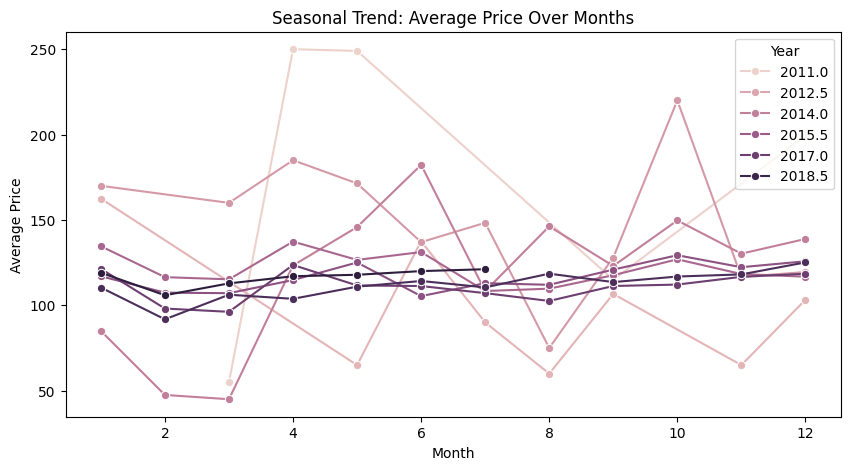

In [21]:
# Price trends over different months.
df_cleaned['year'] = df_cleaned['last_review'].dt.year
df_cleaned['month'] = df_cleaned['last_review'].dt.month
monthly_trends = df_cleaned.groupby(['year', 'month']).agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trends, x="month", y="price", hue="year", marker="o")
plt.title("Seasonal Trend: Average Price Over Months")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend(title="Year")
plt.show()

**Interpretation:**

The line plot illustrates seasonal price trends by showing the average price variation across months. The insights include:

- **Summer Price Surge:** Prices tend to rise during summer months (June–August), likely due to increased tourist demand.
- **Winter Dip:** Prices drop in winter (January–March), possibly due to lower tourism and travel activity.
- **Annual Trends:** Different years follow a similar trend, reinforcing the seasonal nature of Airbnb pricing in NYC.


#**Conclusion**

This analysis provided valuable insights into Airbnb listings in NYC, highlighting key trends in pricing, availability, and seasonal variations.

1. **Market Distribution:**

  - Manhattan and Brooklyn dominate the Airbnb market, with Manhattan having the highest prices.

  - Entire homes/apartments and private rooms are the most common listing types.

2. **Pricing Insights:**

  - Most listings are priced below $200, though some extreme outliers exist.

  - Entire homes tend to have higher median prices compared to private and shared rooms.

3. **Trends and Correlations:**

  - No strong correlation exists between price and most numerical variables.

  - Reviews per month and total number of reviews are positively correlated, indicating popular listings maintain steady engagement.

  - Seasonal trends show that prices tend to increase during summer months and drop during winter.

4. **Future Considerations:**

  - Additional factors such as property size, amenities, and host experience could further improve insights.

  - More advanced modeling could help predict pricing trends and optimize Airbnb listing strategies.

Overall, the findings help understand the NYC Airbnb landscape and provide actionable insights for both hosts and travelers.